# TSF GRIP TASK: Task-2

# Prediction using Unsupervised ML

# From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# Name: Vruti Chitroda

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
cd C:\Users\Vruti\Desktop\Vruti\Sparks foundation

C:\Users\Vruti\Desktop\Vruti\Sparks foundation


In [3]:
df = pd.read_csv('Iris unsupervised.csv')


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df.drop(['Id'], axis=1, inplace=True)

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.shape

(150, 5)

In [8]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
lab = LabelEncoder()

In [15]:
df['Species']= lab.fit_transform(df['Species'])
df['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [16]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Using Pairplots for better understanding of the data points distribution

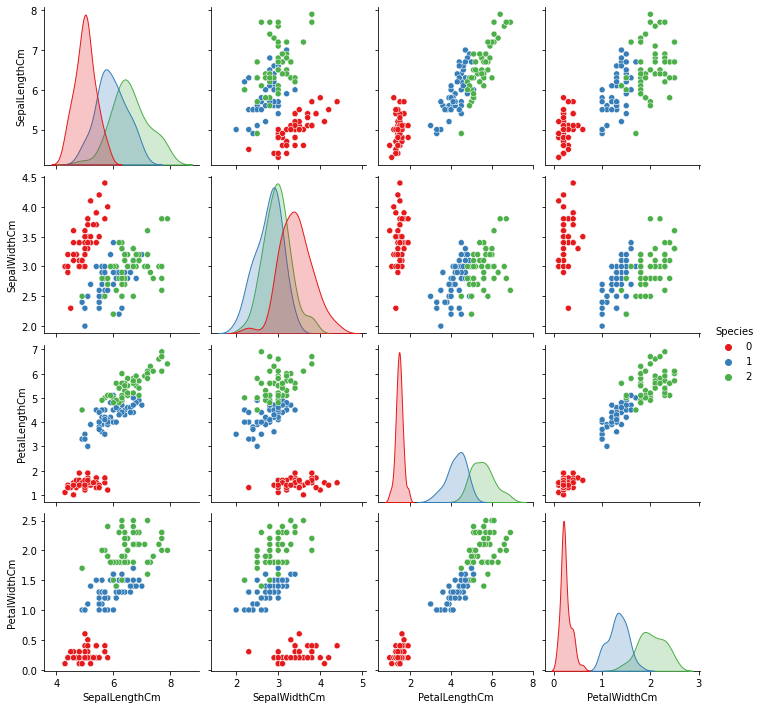

In [17]:
sns.pairplot(data=df, hue='Species', palette='Set1')
plt.show()

# Elbow method using within cluster sum of squares

In [18]:
df = df.iloc[:,[0,1,2,3]].values

In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init= 'k-means++', random_state = 40)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    

In [23]:
wcss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.96478785103787,
 34.19846461871464,
 29.90685675596547,
 27.94540607431786,
 26.3551023225141]

# Using elbow graph to find optimun no. of Clusters

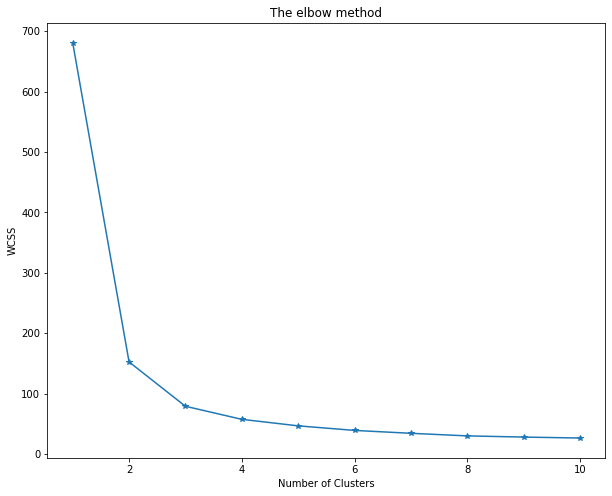

In [34]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker= '*')
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# OBSERVATION: From the above plot we can observe that the optimum number of clusters can be chosen as '3'.

# Initialization using k-means++

In [27]:
kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter = 300, n_init= 10, random_state= 0)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [28]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

# Visulizing the clusters

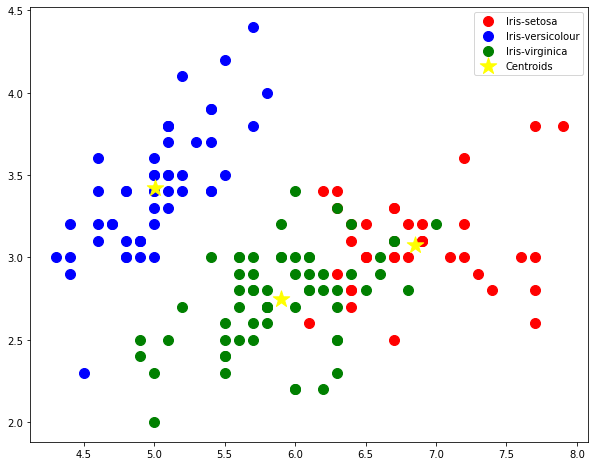

In [30]:
fig = plt.figure(figsize=(10,8))
plt.scatter(df[y_kmeans == 0,0], df[y_kmeans == 0,1], s=100, c='red', label= 'Iris-setosa')
plt.scatter(df[y_kmeans == 1,0], df[y_kmeans == 1,1], s=100, c='blue', label= 'Iris-versicolour')
plt.scatter(df[y_kmeans == 2,0], df[y_kmeans == 2,1], s=100, c='green', label= 'Iris-virginica')

#plotting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label = 'Centroids', marker='*')

plt.legend()
